아래와 같이 텍스트 파일을 읽어 옵니다.

In [1]:
import numpy as np
from os import listdir
from os.path import isfile, join

mypath = './example_En_docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [2]:
len(total_docs)

15

In [3]:
total_docs[0]

'Ryen Aleman was engrossed in the virtual world, focused on the video game in front of him, when he realized the gunshots he was hearing were real. He ducked and bolted for a restroom to take cover.\nAnother mass shooting was unfolding in Florida, this time at a tournament for competitive players of the football video game, Madden, in Jacksonville. The winners would go on to a higher level tournament in Las Vegas in October, where large cash prizes could be won.\nParticipants had gathered at the Jacksonville Landing Complex, an open-air marketplace with stores, bars and restaurants along the St. Johns River.\n\nDavid Katz, a 24-year-old gamer from Baltimore, Maryland, was in Jacksonville for the tournament at GLHF Game Bar, in the back of a pizza restaurant. On Sunday, he brought a gun into the venue and opened fire, killing two people. Then he turned the gun on himself, Jacksonville Sheriff Mike Williams said. Police have not released a possible motive.\nKatz used at least one handgun

In [4]:
import preprocessing # import a python file for English text preprocessing

In [5]:
stopwords = ['be', 'today', 'yesterday', 'tomorrow'] # 불용어 사전 생성하기

In [6]:
docs_nouns = [preprocessing.En_preprocessing(doc, stopwords) for doc in total_docs]

In [7]:
print(docs_nouns[0]) # 첫번째 문서에 대한 내용 ((문서 내용, [명사단어])로 구성)

['aleman', 'world', 'video', 'game', 'front', 'gunshot', 'restroom', 'cover', 'mass', 'shooting', 'florida', 'time', 'tournament', 'player', 'football', 'video', 'game', 'madden', 'jacksonville', 'winner', 'level', 'tournament', 'vega', 'october', 'cash', 'prize', 'participant', 'jacksonville', 'marketplace', 'store', 'bar', 'restaurant', 'st', 'john', 'river', 'david', 'gamer', 'baltimore', 'maryland', 'jacksonville', 'tournament', 'game', 'bar', 'back', 'pizza', 'restaurant', 'sunday', 'gun', 'venue', 'fire', 'people', 'gun', 'mike', 'williams', 'police', 'motive', 'katz', 'handgun', 'sheriff', 'people', 'wound', 'people', 'area', 'williams', 'victim', 'condition', 'hospital', 'sheriff', 'horror', 'stream', 'event', 'game', 'shot', 'people', 'person', 'f', 'whatd', 'call', 'williams', 'officer', 'scene', 'minute', 'bathroom', 'minute', 'ran', 'scene', 'im', 'member', 'jacksonville', 'fire', 'station', 'rock', 'training', 'parking', 'garage', 'street', 'landing', 'dozen', 'people', 'p

In [8]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [9]:
documents_filtered = [' '.join(doc) for doc in docs_nouns] 
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환

In [10]:
documents_filtered[0]

'aleman world video game front gunshot restroom cover mass shooting florida time tournament player football video game madden jacksonville winner level tournament vega october cash prize participant jacksonville marketplace store bar restaurant st john river david gamer baltimore maryland jacksonville tournament game bar back pizza restaurant sunday gun venue fire people gun mike williams police motive katz handgun sheriff people wound people area williams victim condition hospital sheriff horror stream event game shot people person f whatd call williams officer scene minute bathroom minute ran scene im member jacksonville fire station rock training parking garage street landing dozen people president jacksonville association fire fighter person shirt chest wyse person wound firefighter aid others landing wyse officer victim body katzs body hour authority agent bureau alcohol tobacco firearm explosive fbi police family home baltimore katz gaming bread tournament multiple gamers cnn buf

TfidfVectorizer 사용해보기

In [11]:
tfidf_vectorizer = TfidfVectorizer()
DTM_tfidf = tfidf_vectorizer.fit_transform(documents_filtered)
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [12]:
from sklearn.mixture import GaussianMixture

In [30]:
gmm = GaussianMixture(n_components=5, covariance_type='diag')
labels=gmm.fit_predict(DTM_TFIDF)

In [31]:
labels

array([0, 0, 0, 4, 4, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3], dtype=int64)

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

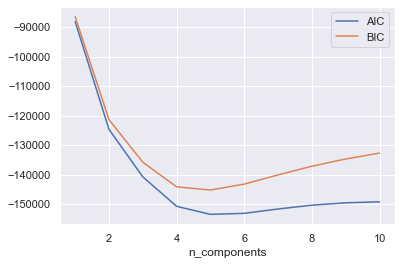

In [32]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='diag',random_state=0).fit(DTM_TFIDF) for n in n_components]
plt.plot(n_components, [m.aic(DTM_TFIDF) for m in models], label='AIC')
plt.plot(n_components, [m.bic(DTM_TFIDF) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components');